In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay
import analyze

In [3]:
result = np.load('result_50', allow_pickle=True)
result.goals = pd.read_csv('../goals.csv')
result.funcs = raybay.get_funcs('funcs.csv')

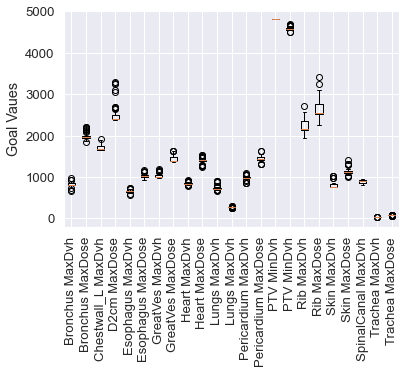

In [8]:
analyze.boxplot(result.goals, result.goal_result, 'goals')

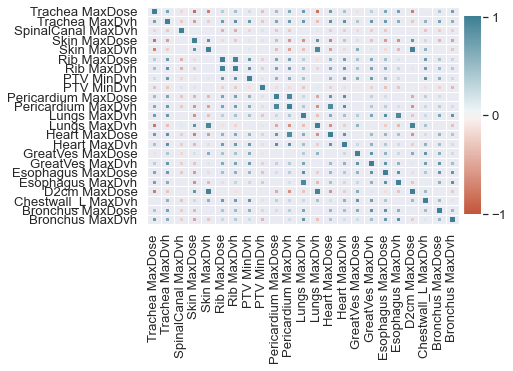

In [9]:
analyze.corrplot(result.goals, result.goal_result, size=10)

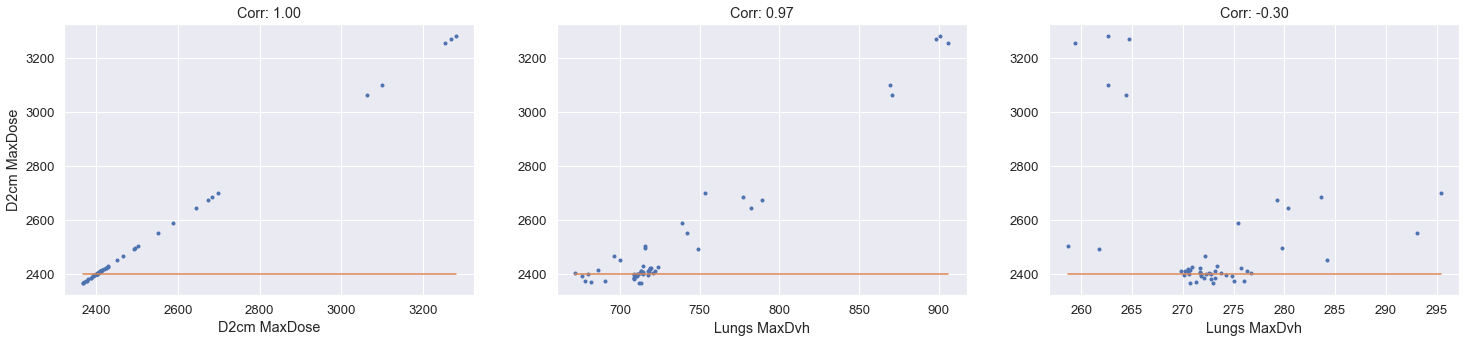

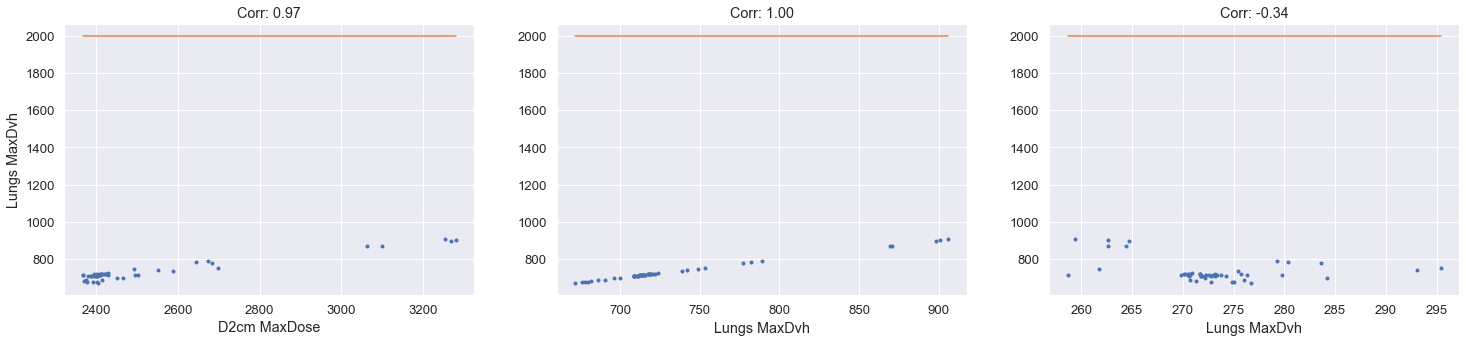

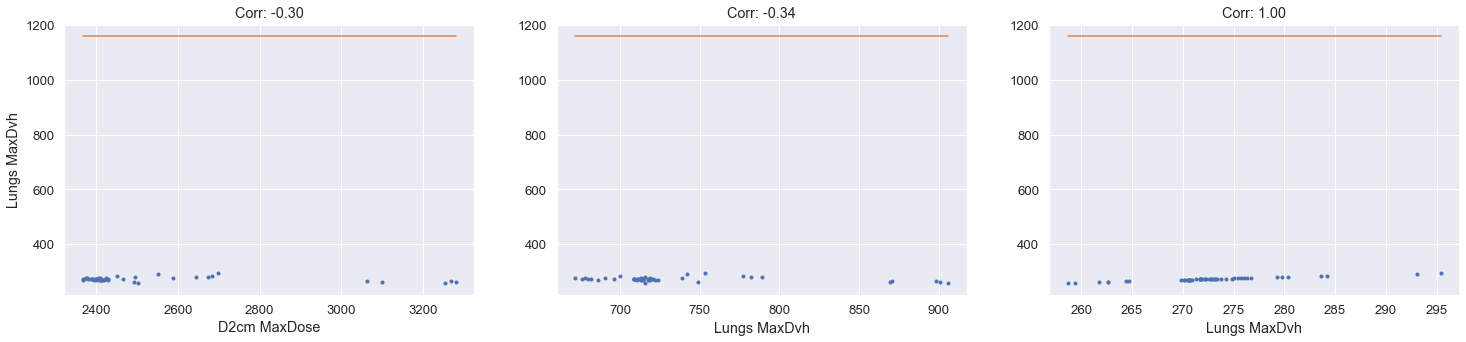

In [21]:
analyze.scatterplot(result.goals[result.goals['Roi'].isin(['Lungs', 'D2cm'])], result.goal_result)

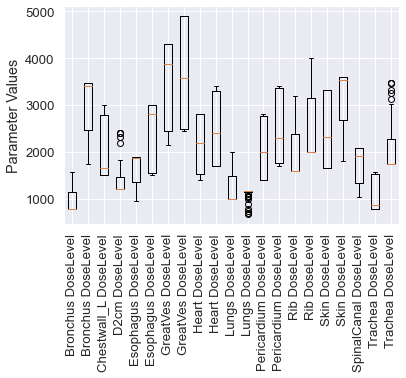

In [10]:
analyze.boxplot(result.funcs, result.opt_result.x_iters, 'pars')

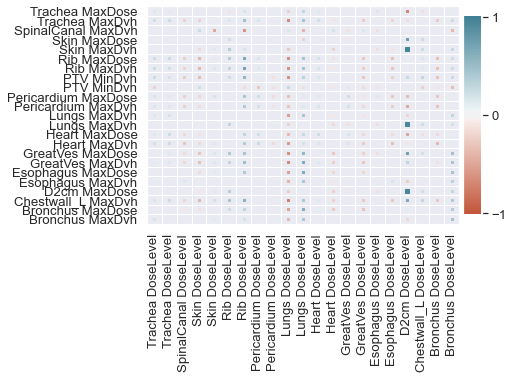

In [12]:
analyze.corrplot(result.goals, result.goal_result, result.funcs, result.opt_result.x_iters, size=10)

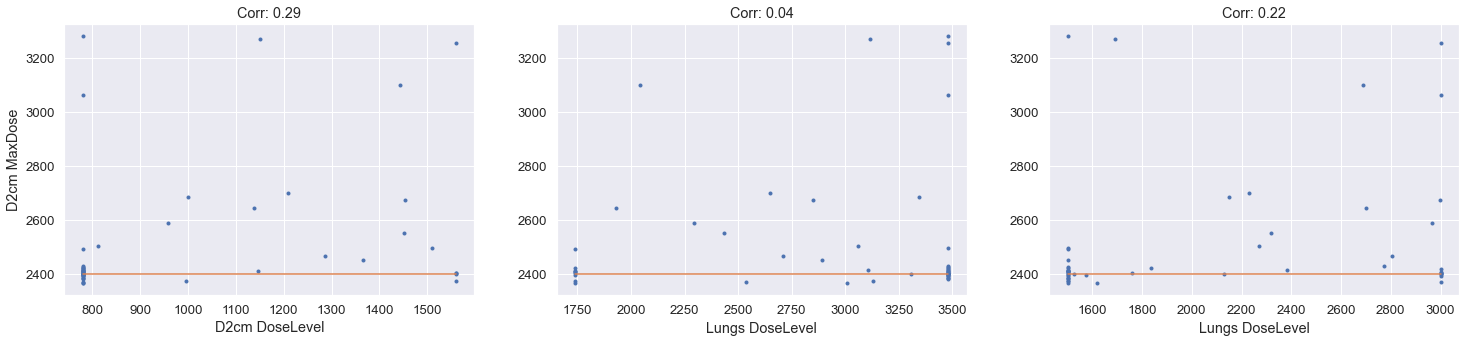

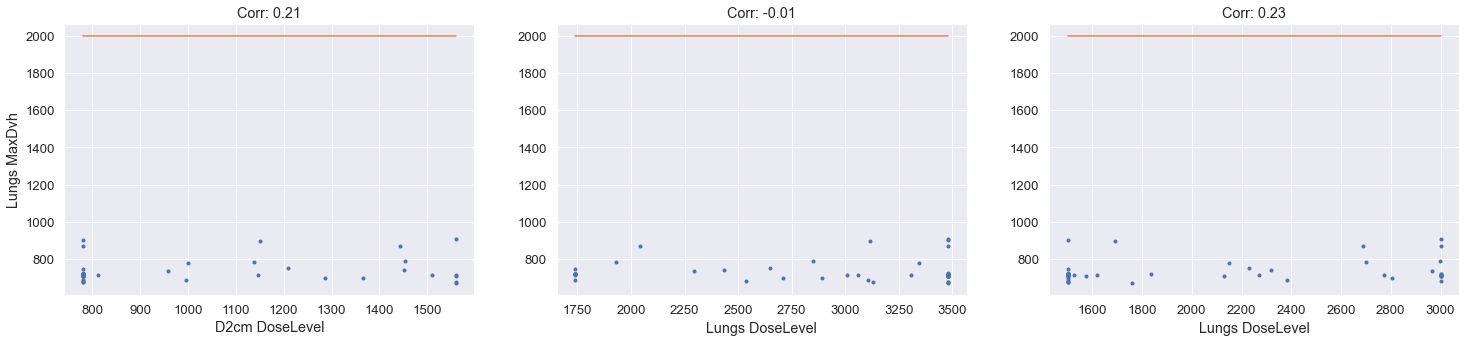

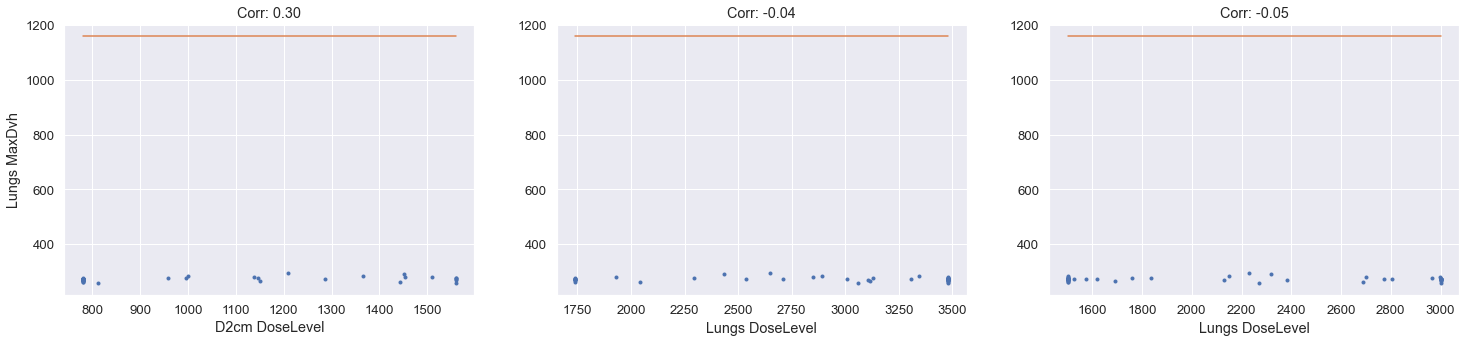

In [22]:
analyze.scatterplot(result.goals[result.goals['Roi'].isin(['Lungs', 'D2cm'])], result.goal_result,
                    result.funcs[result.funcs['Roi'].isin(['Lungs', 'D2cm'])], result.opt_result.x_iters)

In [50]:
# How do the different parameter values correlate with the function value?

corr_data = []
data, labels = analyze.format_data(result.funcs, result.opt_result.x_iters, 'pars')
for ii in range(len(data)):
    corr = np.corrcoef(data[ii], result.opt_result.func_vals)
    corr_data.append(corr[0,1])
    print(f'Roi: {labels[ii]}, Corr:{corr[0,1]:.2f}')
idx = np.argsort(corr_data)

Roi: Bronchus DoseLevel, Corr:0.48
Roi: Bronchus DoseLevel, Corr:-0.23
Roi: Chestwall_L DoseLevel, Corr:0.24
Roi: D2cm DoseLevel, Corr:0.63
Roi: Esophagus DoseLevel, Corr:-0.22
Roi: Esophagus DoseLevel, Corr:-0.06
Roi: GreatVes DoseLevel, Corr:-0.28
Roi: GreatVes DoseLevel, Corr:-0.01
Roi: Heart DoseLevel, Corr:-0.26
Roi: Heart DoseLevel, Corr:0.13
Roi: Lungs DoseLevel, Corr:0.53
Roi: Lungs DoseLevel, Corr:-0.79
Roi: Pericardium DoseLevel, Corr:-0.05
Roi: Pericardium DoseLevel, Corr:0.09
Roi: Rib DoseLevel, Corr:0.56
Roi: Rib DoseLevel, Corr:0.46
Roi: Skin DoseLevel, Corr:0.20
Roi: Skin DoseLevel, Corr:-0.34
Roi: SpinalCanal DoseLevel, Corr:-0.19
Roi: Trachea DoseLevel, Corr:0.24
Roi: Trachea DoseLevel, Corr:0.19


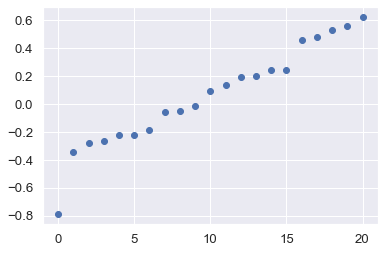

In [53]:
plt.plot(np.array(corr_data)[idx], 'o') # need labels!

In [55]:
idx2 = np.argsort([abs(ii) for ii in corr_data])

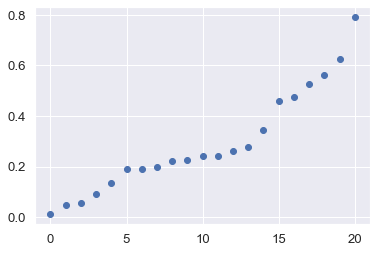

In [58]:
plt.plot(abs(np.array(corr_data))[idx2], 'o')

In [60]:
for ii in idx2:
    print(f'Roi: {labels[ii]}, Corr: {corr_data[ii]}')

Roi: GreatVes DoseLevel, Corr: -0.011377876474482648
Roi: Pericardium DoseLevel, Corr: -0.04869556523637364
Roi: Esophagus DoseLevel, Corr: -0.05534215615357209
Roi: Pericardium DoseLevel, Corr: 0.09364466171054045
Roi: Heart DoseLevel, Corr: 0.13441398067158675
Roi: SpinalCanal DoseLevel, Corr: -0.1887587181274517
Roi: Trachea DoseLevel, Corr: 0.19127173155972857
Roi: Skin DoseLevel, Corr: 0.19721520273692933
Roi: Esophagus DoseLevel, Corr: -0.22322866063604985
Roi: Bronchus DoseLevel, Corr: -0.22601158017592424
Roi: Chestwall_L DoseLevel, Corr: 0.24243688092054227
Roi: Trachea DoseLevel, Corr: 0.2425363164369322
Roi: Heart DoseLevel, Corr: -0.2631236262729669
Roi: GreatVes DoseLevel, Corr: -0.27661987995657006
Roi: Skin DoseLevel, Corr: -0.34379640929847577
Roi: Rib DoseLevel, Corr: 0.45927541528424193
Roi: Bronchus DoseLevel, Corr: 0.4766526308902697
Roi: Lungs DoseLevel, Corr: 0.5268592374825541
Roi: Rib DoseLevel, Corr: 0.5603182876767949
Roi: D2cm DoseLevel, Corr: 0.6253407733054

In [61]:
result2 = np.load('result', allow_pickle=True)

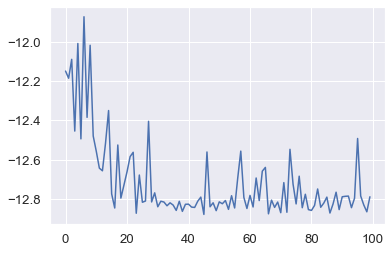

In [62]:
plt.plot(result2.opt_result.func_vals)

In [63]:
result2.opt_result.fun

-12.878016096364856